In [5]:
import numpy as np
import matplotlib.pyplot as plt

from utils import X2, Y2, vectorOS2, vectorS2S1, Fel, vectorOS2orth, Mel

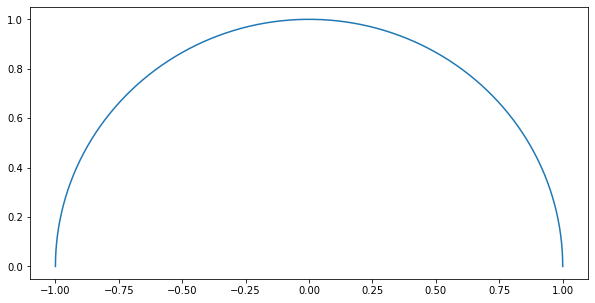

In [6]:
# test X2 Y2
x2, y2 = 1, 0
theta_r = np.linspace(0, np.pi, 100)
x = X2(x2, y2, theta_r)
y = Y2(x2, y2, theta_r)


plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.show()

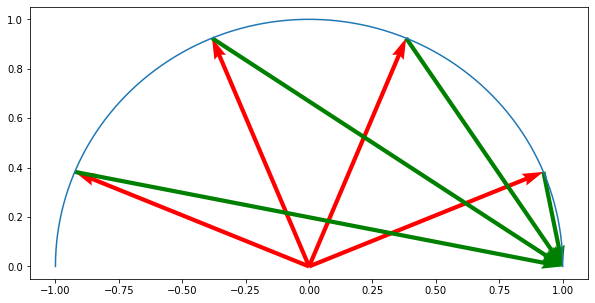

In [7]:
# test vector OS2 and vectorS2S1
x1, y1 = 1, 0
x2, y2 = 1, 0

n = 4
theta_r_light = np.linspace(np.pi/(2*n), np.pi*(2*n-1)/(2*n), n)
OS2 = vectorOS2(x2, y2, theta_r_light)
S2S1 = vectorS2S1(x1, y1, x2, y2, theta_r_light)
O = np.zeros(OS2.shape)

theta_r = np.linspace(0, np.pi, 100)
x = X2(x2, y2, theta_r)
y = Y2(x2, y2, theta_r)

plt.figure(figsize=(10,5))
plt.plot(x, y)

plt.quiver(O[0,:], O[1,:], OS2[0,:], OS2[1,:], color=['r']*n, angles='xy', scale_units='xy', scale=1)
plt.quiver(OS2[0,:], OS2[1,:], S2S1[0,:], S2S1[1,:], color=['g']*n, angles='xy', scale_units='xy', scale=1)
plt.show()

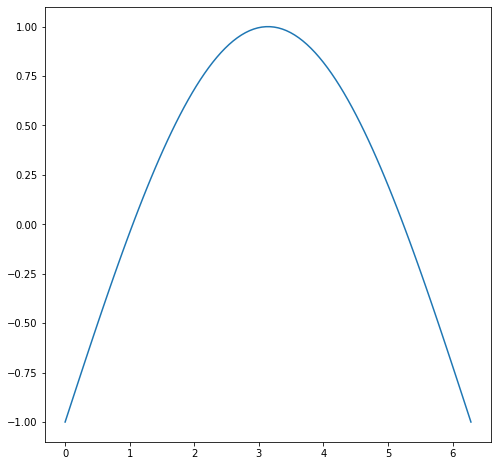

In [8]:
# test Fel
x1, y1 = 1, 0
x2, y2 = 1, 0
k = 1
L0 = 1

theta_r = np.linspace(0, 2*np.pi, 100)
force = Fel(x1, y1, x2, y2, theta_r, k, L0)

plt.figure(figsize=(8,8))
plt.plot(theta_r, force)

plt.show()

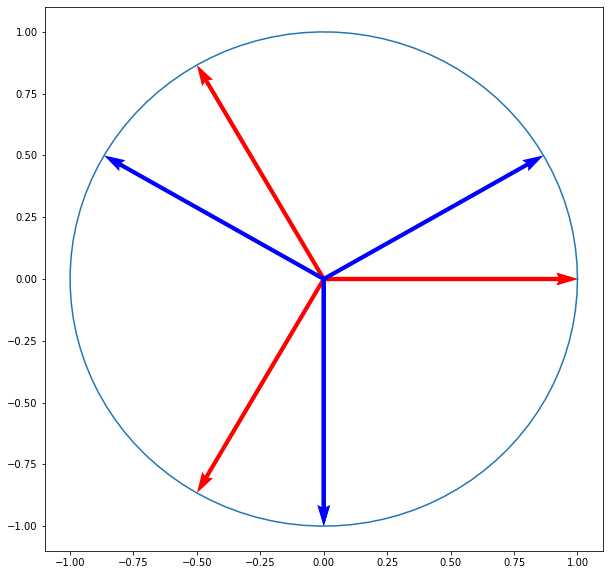

In [9]:
# test vectorOS2orth
x2, y2 = 1, 0

n = 4
theta_r_light = np.linspace(0, 2*np.pi, n)
OS2 = vectorOS2(x2, y2, theta_r_light)
OS2orth = vectorOS2orth(x2, y2, theta_r_light)
O = np.zeros(OS2.shape)

theta_r = np.linspace(0, 2*np.pi, 100)
x = X2(x2, y2, theta_r)
y = Y2(x2, y2, theta_r)

plt.figure(figsize=(10,10))

plt.quiver(O[0,:], O[1,:], OS2[0,:], OS2[1,:], color=['r']*n, angles='xy', scale_units='xy', scale=1)
plt.quiver(O[0,:], O[1,:], OS2orth[0,:], OS2orth[1,:], color=['b']*n, angles='xy', scale_units='xy', scale=1)

plt.plot(x, y)

plt.show()

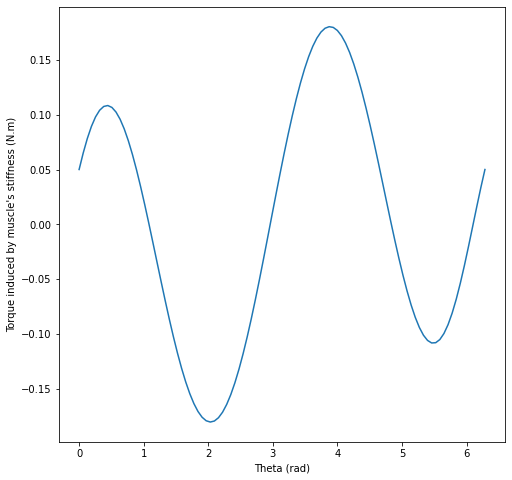

In [10]:
# test Mel
x1, y1 = 1, .2
x2, y2 = .5, .2
k = 1
L0 = 1

theta_r = np.linspace(0, 2*np.pi, 100)
torque = Mel(x1, y1, x2, y2, theta_r, k, L0)

plt.figure(figsize=(8,8))
plt.plot(theta_r, torque)

plt.xlabel("Theta (rad)")
plt.ylabel("Torque induced by muscle's stiffness (N.m)")

plt.show()

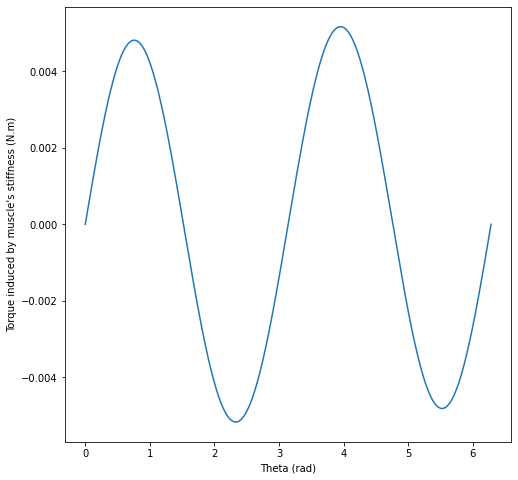

In [11]:
# test Mel 2
x1, y1 = 1, 0
x2, y2 = .1, 0
k = 1
L0 = 1

theta_r = np.linspace(0, 2*np.pi, 1000)
torque = Mel(x1, y1, x2, y2, theta_r, k, L0)

plt.figure(figsize=(8,8))
plt.plot(theta_r, torque)

plt.xlabel("Theta (rad)")
plt.ylabel("Torque induced by muscle's stiffness (N.m)")

plt.show()

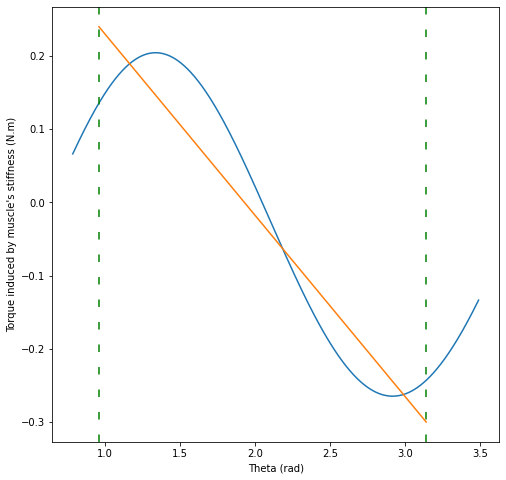

In [12]:
# test with biceps brachii
x1, y1 = .2, .02
x2, y2 = .05, -.03

E = 24.7e3 # Young's module
A = .08*.07 # cross sectionnal area

L0 = .2
k = E*A/L0

theta_r = np.linspace(np.pi/4, np.pi*(10/9), 1000)
torque = Mel(x1, y1, x2, y2, theta_r, k, L0)

smaller_theta = 55/180*np.pi
st_M = .24

upper_theta = np.pi
ut_M = -.3

plt.figure(figsize=(8,8))
plt.plot(theta_r, torque)

loosely_dashed = (0, (5, 10))
plt.axvline(x=smaller_theta,linestyle=loosely_dashed, color='g')
plt.axvline(x=upper_theta, linestyle=loosely_dashed, color='g')

plt.plot([smaller_theta, upper_theta], [st_M, ut_M])

plt.xlabel("Theta (rad)")
plt.ylabel("Torque induced by muscle's stiffness (N.m)")

plt.show()

Max torque induced by biceps stiffness: $T_m \approx 0.2 \,N.m$


Interpolation coeff: $C \approx -0.25 \,N.m.rad^{-1}$


Torque of a $1 \,kg$ mass grasped in the hand with horizontal arm: $T_{kg} = mgL$<br/> with $m = 1 \,kg$, $g=9.8 \, m.s^{-2}$ and $L\approx 0.3 m$ <br/> *NA:* $T_{kg} \approx 2.9 \,N.m$